In [1]:

import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
a1 = ['송중기', '남', 1, 79, 93]
a2 = ['김나현', '여', 1, 85, 85]
a3 = ['권보아', '여', 1, 91, 78]
a4 = ['김범수', '남', 1, 97, 98]
a5 = ['이효리', '여', 2, 93, 79]
a6 = ['박효신', '남', 2, 78, 90]
a7 = ['한예슬', '여', 2, 87, 74]
a8 = ['민경훈', '남', 2, 99, 89]
col1 = ["", "성별", "반", "국어", "영어"]
df1 = pd.DataFrame([a1, a2, a3, a4, a5, a6, a7, a8], columns=col1).set_index("")
df2 = df1.copy()
df2.loc["이효리", "반"] = 1
df2["인원"] = 1
s1 = df1["국어"].copy()

df1

,성별,반,국어,영어
,,,,
송중기,남,1,79,93
김나현,여,1,85,85
권보아,여,1,91,78
김범수,남,1,97,98
이효리,여,2,93,79
박효신,남,2,78,90
한예슬,여,2,87,74
민경훈,남,2,99,89


In [4]:
df1.groupby(["성별","반"])[["국어","영어"]].agg("mean")

국어    영어
성별 반            
남  1 88.00 95.50
   2 88.50 89.50
여  1 88.00 81.50
   2 90.00 76.50

In [5]:
df1.pivot_table(values=["국어", "영어"], index=["성별", "반"], aggfunc="mean")

국어    영어
성별 반            
남  1 88.00 95.50
   2 88.50 89.50
여  1 88.00 81.50
   2 90.00 76.50

In [7]:
df1.pivot_table(values=["국어"], index=["성별"], columns=["반"], aggfunc="mean")

#group by와 pivot을 비교하여 잘 숙지하자

국어      
반      1     2
성별            
남  88.00 88.50
여  88.00 90.00

In [8]:
df1.groupby(["성별", "반"])["국어"].agg("mean")
#위에 쓴 피벗과 형은 다르지만, 결과는 같음

성별  반
남   1   88.00
    2   88.50
여   1   88.00
    2   90.00
Name: 국어, dtype: float64

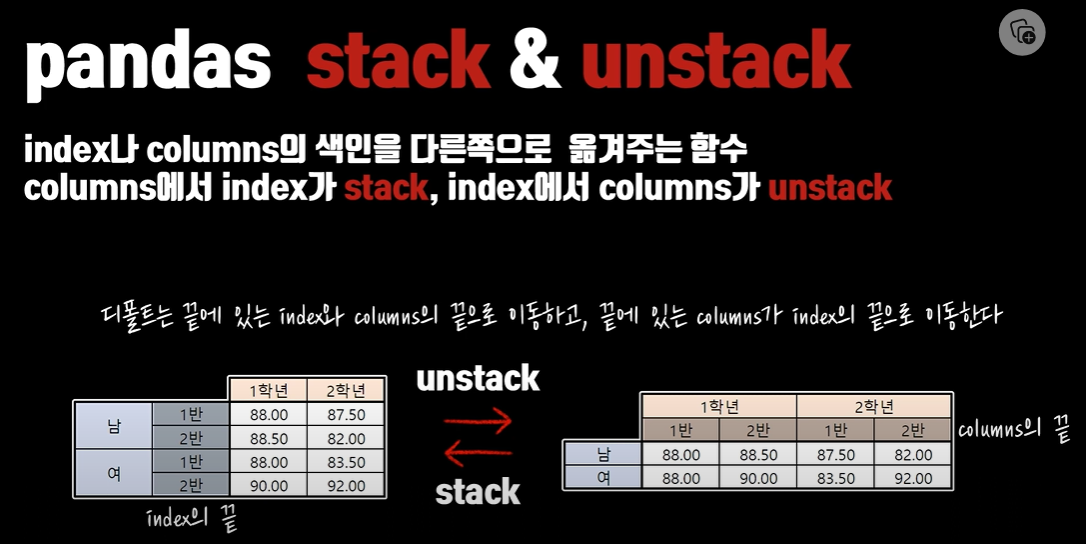

In [9]:
# stack : columns에서 index로 보냄
# unstack : index에서 columns로 보냄


df1.groupby(["성별", "반"])["국어"].agg("mean").unstack()
# unstack으로 피벗과 같은 형을 만들 수 있음

반,1,2
성별,,
남,88.00,88.50
여,88.00,90.00


In [10]:
df2

,성별,반,국어,영어,인원
,,,,,
송중기,남,1,79,93,1
김나현,여,1,85,85,1
권보아,여,1,91,78,1
김범수,남,1,97,98,1
이효리,여,1,93,79,1
박효신,남,2,78,90,1
한예슬,여,2,87,74,1
민경훈,남,2,99,89,1


In [11]:
df2.groupby(["성별", "반"])[["영어", "인원"]].agg({"영어":"mean", "인원":"sum"})

영어  인원
성별 반          
남  1 95.50   2
   2 89.50   2
여  1 80.67   3
   2 74.00   1

In [18]:
df2.groupby(["성별", "반"])[
    ["영어", "인원"]
    ].agg(
    {"영어":"mean"
     , "인원":"sum"}
    )
# 줄바꿈이 생각만큼 자유롭지 않음

영어  인원
성별 반          
남  1 95.50   2
   2 89.50   2
여  1 80.67   3
   2 74.00   1

In [20]:
df2.groupby(["성별", "반"])[["국어", "영어"]].agg(lambda x : x.max() - x.min())
#groupby가 피벗보다 좋은 점은 사용자 함수를 편히 쓸 수있음

국어  영어
성별 반        
남  1  18   5
   2  21   1
여  1   8   7
   2   0   0

In [21]:
s1


송중기    79
김나현    85
권보아    91
김범수    97
이효리    93
박효신    78
한예슬    87
민경훈    99
Name: 국어, dtype: int64

In [22]:
s1 > 80


송중기    False
김나현     True
권보아     True
김범수     True
이효리     True
박효신    False
한예슬     True
민경훈     True
Name: 국어, dtype: bool

In [23]:
sum(s1 > 80)
# false는 집계되지 않음, true만 집계됨

6

In [24]:
df2.groupby(["성별", "반"])[["국어","영어"]].agg(lambda x : sum(x > 80))
# 80점보다 큰 인원수를 찾는 집계함수가 됨

# 이 부분은 꼭 숙지할 것

국어  영어
성별 반        
남  1   1   2
   2   1   2
여  1   3   1
   2   1   0

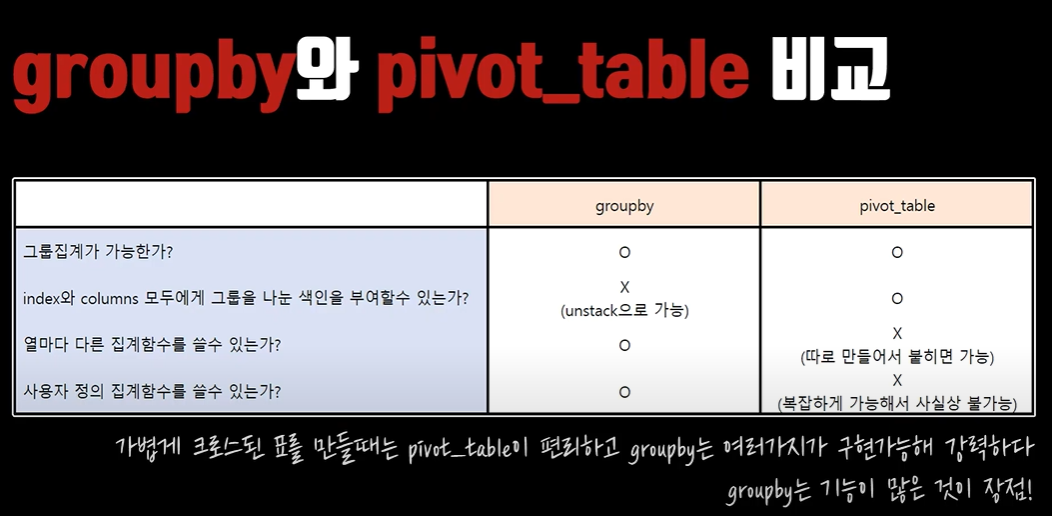